In [2]:
import pandas as pd
Netflix_DB = pd.read_csv('/Users/mirkomacbookairm1/Downloads/Netflix_DB.csv')

In [4]:
print(Netflix_DB.head())

  Profile Name          Start Time Duration  Attributes  \
0      Charlie  2013-03-20 5:17:53  0:00:05         NaN   
1      Charlie  2013-03-20 4:27:45  0:44:31         NaN   
2      Charlie  2013-03-20 4:05:21  0:22:06         NaN   
3      Charlie  2013-03-20 0:20:03  0:48:14         NaN   
4      Charlie  2013-03-20 0:10:31  0:04:51         NaN   

                                               Title  Supplemental Video Type  \
0  Star Trek: Deep Space Nine: Season 5: Empok No...                      NaN   
1  Star Trek: Deep Space Nine: Season 5: Blaze of...                      NaN   
2  Star Trek: Deep Space Nine: Season 5: Children...                      NaN   
3                                  The Invisible War                      NaN   
4                                  The Invisible War                      NaN   

          Device Type Bookmark  Latest Bookmark             Country  
0                 Mac  0:00:05  Not latest view  US (United States)  
1                 

In [ ]:
#quel che voglio fare è scoprire quali sono le ore in cui charlie guarda "the office" di più.
#per farlo, 
# 1. prendo solo colonna E(Title) che contiene il titolo. 
# 2. prendo lo starting time (colonna B), ci sommo duration(D)e attribuisco un punto a tutte le ore comprese tra l'orario di inizio e quello di fine.
# 3. creo un grafico barth con le ore e il numero di punti che ho attribuito a ciascuna ora.

Passaggio 1


In [14]:
#Filtro colonna E per "The Office"

E= Netflix_DB['Title']

In [16]:
Netflix_DB_filtrato = Netflix_DB[E.str.contains("The Office", case=False, na=False)]

# Visualizza il risultato
print(Netflix_DB_filtrato)

    Profile Name           Start Time Duration  Attributes  \
9        Charlie  2013-03-18 23:25:36  0:00:02         NaN   
10       Charlie  2013-03-18 23:04:22  0:21:07         NaN   
11       Charlie  2013-03-18 22:42:50  0:21:30         NaN   
12       Charlie  2013-03-18 22:21:52  0:20:55         NaN   
13       Charlie  2013-03-18 22:20:53  0:00:55         NaN   
..           ...                  ...      ...         ...   
152      Charlie   2013-03-09 2:35:43  0:00:55         NaN   
153      Charlie   2013-03-09 0:52:42  0:20:44         NaN   
154      Charlie   2013-03-09 0:29:16  0:21:48         NaN   
155      Charlie  2013-03-08 23:45:38  0:21:48         NaN   
156      Charlie  2013-03-08 23:23:26  0:21:12         NaN   

                                                 Title  \
9    The Office (U.S.): Season 5: The Duel (Episode...   
10   The Office (U.S.): Season 5: Moroccan Christma...   
11   The Office (U.S.): Season 5: The Surplus (Epis...   
12   The Office (U.S.):

In [ ]:
Passaggio 2: Calcolo le ore di inizio e fine

In [38]:
B = Netflix_DB_filtrato['Start Time']
Net_Filtro_ora = pd.to_datetime(B, format='%y/%m/%d %H:%M')

# Estrae solo l'ora e formatta in am/pm
Net_Filtro_am = Net_Filtro_ora.dt.strftime('%-I%p').str.lower()


# Mostra il risultato
print(Net_Filtro_am)

ValueError: time data "2013-03-18 23:25:36" doesn't match format "%y/%m/%d %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
import pandas as pd

# Converte la colonna Start Time in datetime (senza specificare un format!)
Net_Filtro_ora = pd.to_datetime(Netflix_DB_filtrato['Start Time'])

# Estrae l'ora in formato am/pm
Net_Filtro_am = Net_Filtro_ora.dt.strftime('%-I%p').str.lower()

# Aggiunge la nuova colonna al DataFrame originale
Netflix_DB_filtrato['K'] = Net_Filtro_am

# Mostra qualche riga per verifica
print(Netflix_DB_filtrato[['Start Time', 'K']].head())




             Start Time     K
9   2013-03-18 23:25:36  11pm
10  2013-03-18 23:04:22  11pm
11  2013-03-18 22:42:50  10pm
12  2013-03-18 22:21:52  10pm
13  2013-03-18 22:20:53  10pm


/var/folders/rc/c72n13zx5rx_yn87388201dh0000gn/T/ipykernel_8188/2067249012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_DB_filtrato['K'] = Net_Filtro_am


In [43]:


# Crea nuovi nomi tipo "A", "B", "C", ...
nuovi_nomi = [chr(65 + i) for i in range(len(Netflix_DB_filtrato.columns))]  # 65 è 'A' in ASCII

# Assegna i nuovi nomi
Netflix_DB_filtrato.columns = nuovi_nomi

# Verifica
print(Netflix_DB_filtrato.head())


          A                    B        C   D  \
9   Charlie  2013-03-18 23:25:36  0:00:02 NaN   
10  Charlie  2013-03-18 23:04:22  0:21:07 NaN   
11  Charlie  2013-03-18 22:42:50  0:21:30 NaN   
12  Charlie  2013-03-18 22:21:52  0:20:55 NaN   
13  Charlie  2013-03-18 22:20:53  0:00:55 NaN   

                                                    E   F    G        H  \
9   The Office (U.S.): Season 5: The Duel (Episode... NaN  Mac  0:00:01   
10  The Office (U.S.): Season 5: Moroccan Christma... NaN  Mac  0:21:06   
11  The Office (U.S.): Season 5: The Surplus (Epis... NaN  Mac  0:21:29   
12  The Office (U.S.): Season 5: Frame Toby (Episo... NaN  Mac  0:20:55   
13  The Office (U.S.): Season 5: Business Trip (Ep... NaN  Mac  0:21:09   

                  I                   J     K  
9   Not latest view  US (United States)  11pm  
10  Not latest view  US (United States)  11pm  
11  Not latest view  US (United States)  10pm  
12  Not latest view  US (United States)  10pm  
13  Not latest

In [51]:
import pandas as pd

# Se la colonna B non è già datetime, la convertiamo
Netflix_DB_filtrato['B'] = pd.to_datetime(Netflix_DB_filtrato['B'])

# Converte la colonna H (durata) in timedelta
Netflix_DB_filtrato['H'] = pd.to_timedelta(Netflix_DB_filtrato['H'])

# Somma la durata alla colonna B
Netflix_DB_filtrato['L_temp'] = Netflix_DB_filtrato['B'] + Netflix_DB_filtrato['H']

# Estrae l'orario in formato am/pm
Netflix_DB_filtrato['L'] = Netflix_DB_filtrato['L_temp'].dt.strftime('%-I%p').str.lower()

# Rimuove la colonna temporanea
Netflix_DB_filtrato.drop(columns=['L_temp'], inplace=True)

# Mostra il risultato
print(Netflix_DB_filtrato[['B', 'H', 'L']].head(30))


                     B               H     L
9  2013-03-18 23:25:36 0 days 00:00:01  11pm
10 2013-03-18 23:04:22 0 days 00:21:06  11pm
11 2013-03-18 22:42:50 0 days 00:21:29  11pm
12 2013-03-18 22:21:52 0 days 00:20:55  10pm
13 2013-03-18 22:20:53 0 days 00:21:09  10pm
14 2013-03-18 20:29:22 0 days 00:20:17   8pm
15 2013-03-18 20:07:57 0 days 00:21:23   8pm
16 2013-03-18 19:46:38 0 days 00:21:15   8pm
17 2013-03-18 19:24:10 0 days 00:21:36   7pm
18 2013-03-18 18:20:16 0 days 00:21:14   6pm
19 2013-03-18 17:54:26 0 days 00:21:16   6pm
20 2013-03-18 17:36:27 0 days 00:21:06   5pm
21 2013-03-18 05:35:10 0 days 00:05:20   5am
22 2013-03-18 05:00:02 0 days 00:21:03   5am
23 2013-03-18 04:27:20 0 days 00:41:27   5am
24 2013-03-17 05:40:18 0 days 00:08:52   5am
25 2013-03-17 05:10:14 0 days 00:20:20   5am
26 2013-03-17 04:48:28 0 days 00:21:42   5am
27 2013-03-17 04:31:32 0 days 00:20:48   4am
28 2013-03-16 20:14:27 0 days 00:04:58   8pm
29 2013-03-16 19:52:58 0 days 00:21:20   8pm
30 2013-03

/var/folders/rc/c72n13zx5rx_yn87388201dh0000gn/T/ipykernel_8188/4104468346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_DB_filtrato['B'] = pd.to_datetime(Netflix_DB_filtrato['B'])
/var/folders/rc/c72n13zx5rx_yn87388201dh0000gn/T/ipykernel_8188/4104468346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_DB_filtrato['H'] = pd.to_timedelta(Netflix_DB_filtrato['H'])
/var/folders/rc/c72n13zx5rx_yn87388201dh0000gn/T/ipykernel_8188/4104468346.py:10: SettingWithCopyWarning: 
A value is try

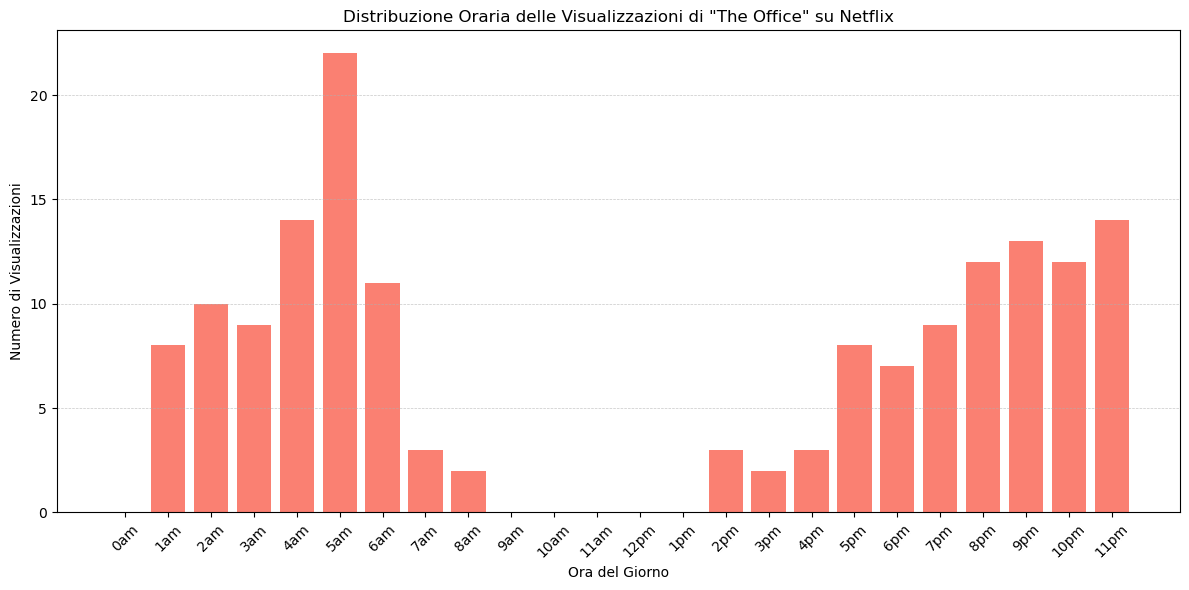

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista completa delle ore, da 12am a 11pm
ore_giornata = [f"{h}am" if h < 12 else f"{h-12 or 12}pm" for h in range(24)]
ore_giornata = [x.lower() for x in ore_giornata]

# Inizializza il conteggio a zero
conteggio_ore = dict.fromkeys(ore_giornata, 0)

# Funzione sicura per ottenere l’intervallo tra due ore (ignorando valori anomali)
def intervallo_ore(start, end):
    try:
        idx_start = ore_giornata.index(start)
        idx_end = ore_giornata.index(end)
    except ValueError:
        return []  # ignora la riga se l'ora non è nella lista
    if idx_start <= idx_end:
        return ore_giornata[idx_start:idx_end + 1]
    else:
        return ore_giornata[idx_start:] + ore_giornata[:idx_end + 1]

# Conta le ore tra K e L per ogni riga del DataFrame
for _, row in Netflix_DB_filtrato.iterrows():
    start = str(row['K']).lower().strip()
    end = str(row['L']).lower().strip()
    for ora in intervallo_ore(start, end):
        conteggio_ore[ora] += 1

# Grafico a barre
plt.figure(figsize=(12, 6))
plt.bar(conteggio_ore.keys(), conteggio_ore.values(), color='salmon')
plt.xticks(rotation=45)
plt.xlabel('Ora del Giorno')
plt.ylabel('Numero di Visualizzazioni')
plt.title('Distribuzione Oraria delle Visualizzazioni di "The Office" su Netflix')

# Aggiunta delle linee orizzontali tratteggiate sull’asse y
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


In [56]:
# Visualizza tutti i dati in formato tabellare
pd.set_option('display.max_rows', None)      # Mostra tutte le righe
pd.set_option('display.max_columns', None)   # Mostra tutte le colonne
pd.set_option('display.width', 1000)         # Aumenta la larghezza della console
pd.set_option('display.colheader_justify', 'center')  # Centra i nomi delle colonne

print(Netflix_DB_filtrato)

       A              B             C       D                         E                            F             G                    H          I            J            K     L  
9    Charlie 2013-03-18 23:25:36  0:00:02 NaN  The Office (U.S.): Season 5: The Duel (Episode... NaN                       Mac 0 days 00:00:01  11pm  US (United States)  11pm  11pm
10   Charlie 2013-03-18 23:04:22  0:21:07 NaN  The Office (U.S.): Season 5: Moroccan Christma... NaN                       Mac 0 days 00:21:06  11pm  US (United States)  11pm  11pm
11   Charlie 2013-03-18 22:42:50  0:21:30 NaN  The Office (U.S.): Season 5: The Surplus (Epis... NaN                       Mac 0 days 00:21:29  11pm  US (United States)  10pm  11pm
12   Charlie 2013-03-18 22:21:52  0:20:55 NaN  The Office (U.S.): Season 5: Frame Toby (Episo... NaN                       Mac 0 days 00:20:55  10pm  US (United States)  10pm  10pm
13   Charlie 2013-03-18 22:20:53  0:00:55 NaN  The Office (U.S.): Season 5: Business Trip (Ep..